# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API keys
from api_keys import weather_api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Might have a space in the name')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | kapaa
Processing Record 2 | mar del plata
Processing Record 3 | haverfordwest
Processing Record 4 | ponta do sol
Processing Record 5 | palmer
Processing Record 6 | dali
Processing Record 7 | khatanga
Processing Record 8 | bengkulu
Processing Record 9 | chapais
City not found. Might have a space in the name
Processing Record 10 | bredasdorp
Processing Record 11 | nemuro
Processing Record 12 | harper
Processing Record 13 | esperance
Processing Record 14 | morondava
Processing Record 15 | albany
City not found. Might have a space in the name
Processing Record 16 | sorland
Processing Record 17 | thinadhoo
Processing Record 18 | leh
Processing Record 19 | hobart
Processing Record 20 | tuktoyaktuk
Processing Record 21 | la ronge
Processing Record 22 | castro
City not found. Might have a space in the name
Processing Record 23 | nikolskoye
Processing Record 24 | yakeshi
Processing Record 25 | carberry
Processing Record 26

Processing Record 231 | banepa
Processing Record 232 | cracow
Processing Record 233 | severnyy
Processing Record 234 | egvekinot
Processing Record 235 | lixourion
City not found. Might have a space in the name
Processing Record 236 | kruisfontein
Processing Record 237 | salalah
Processing Record 238 | suwalki
Processing Record 239 | bobcaygeon
Processing Record 240 | moerai
Processing Record 241 | asfi
Processing Record 242 | salacgriva
Processing Record 243 | kieta
Processing Record 244 | paamiut
Processing Record 245 | volokonovka
Processing Record 246 | iguape
Processing Record 247 | bethal
Processing Record 248 | padang
Processing Record 249 | kondinskoye
Processing Record 250 | kisangani
Processing Record 251 | panaba
Processing Record 252 | povenets
Processing Record 253 | kaseda
Processing Record 254 | krasnorechenskiy
City not found. Might have a space in the name
City not found. Might have a space in the name
Processing Record 255 | buala
Processing Record 256 | taloqan
Proces

Processing Record 441 | port moresby
Processing Record 442 | livramento
City not found. Might have a space in the name
Processing Record 443 | kavaratti
Processing Record 444 | san jeronimo
Processing Record 445 | cherskiy
Processing Record 446 | marsh harbour
Processing Record 447 | poselki
Processing Record 448 | temirtau
Processing Record 449 | hiji
Processing Record 450 | zhangjiakou
Processing Record 451 | maxixe
Processing Record 452 | olafsvik
Processing Record 453 | verkhnyaya khava
Processing Record 454 | ercis
Processing Record 455 | nome
Processing Record 456 | kosjeric
Processing Record 457 | bowen
Processing Record 458 | basco
Processing Record 459 | tynda
Processing Record 460 | malesina
Processing Record 461 | touros
Processing Record 462 | necochea
Processing Record 463 | varkaus
Processing Record 464 | green river
Processing Record 465 | tacuati
Processing Record 466 | lerwick
Processing Record 467 | muli
City not found. Might have a space in the name
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create values dictionary from API call lists.
weather_data = {
    'City': name_city,
    'Lat': lats,
    'Lng': lngs,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
weather_data_df = pd.DataFrame(weather_data)

# Display count of weather values per column.
#weather_data_df.count()
weather_data_df

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Max Temperature,Wind Speed
0,Kapaa,22.08,-159.32,40,US,1593141726,69,82.40,13.87
1,Mar del Plata,-38.00,-57.56,5,AR,1593141666,65,42.01,6.93
2,Haverfordwest,51.80,-4.97,87,GB,1593141728,93,66.00,2.24
3,Ponta do Sol,32.67,-17.10,40,PT,1593141729,64,68.00,6.93
4,Palmer,42.16,-72.33,15,US,1593141730,64,70.00,2.06
...,...,...,...,...,...,...,...,...,...
571,Verkhovazh'ye,60.75,42.05,48,RU,1593142361,65,59.67,6.11
572,Muravlenko,63.79,74.52,81,RU,1593142362,86,51.31,16.08
573,Portage,41.17,-81.20,40,US,1593142364,87,66.00,6.31
574,Korla,41.76,86.15,42,CN,1593142365,80,69.01,10.98


In [6]:
# Export to csv
weather_data_df.to_csv('../output_data/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This chart shows a clear relationship between a location's max temperature and its proximity to the equator. Temperatures rise as we move closer to the equator and fall as we move away from it.

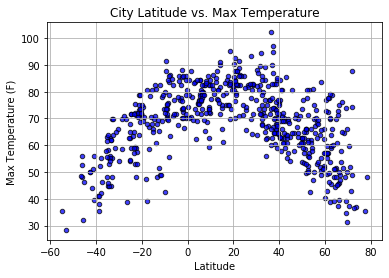

In [10]:
northern_hem_data_df = weather_data_df['Lat'] >= 0
northern_hem_data_df = weather_data_df[northern_hem_data_df]

# Create scatter plot for Lat vs Max Temp.
plt.scatter(weather_data_df['Lat'], weather_data_df['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Max_Temp_vs_Lat.png')

plt.show()

## Latitude vs. Humidity Plot

While the geos that are registering a humidity level range from -60 to 80 degrees latitude there is no significant correlation between latitude and humidity.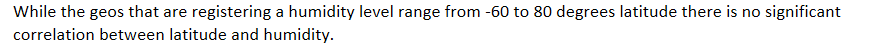

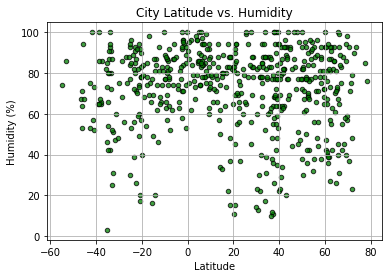

In [11]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Humidity_vs_Lat.png')

plt.show()

## Latitude vs. Cloudiness Plot

While there is a repetition of cities registering either 0% or 100% cloudiness there is no clear positive or negative relationship between latitude and cloudiness. Similar to the humidity analysis, cities range in cloudiness regardless of their latitude.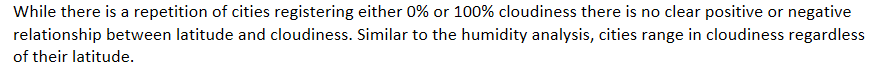

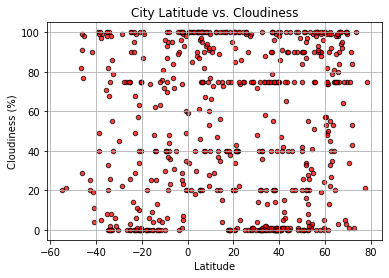

In [12]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Cloudiness_vs_Lat.png')

plt.show()

## Latitude vs. Wind Speed Plot

While wind speeds generally stay below 20 MPH, there is no obvious relationship between a location's latitude and wind speed.

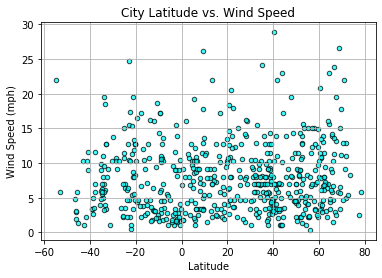

In [13]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Windspeed_vs_Lat.png')

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

# Northern
northern_hem_data_df = weather_data_df['Lat'] >= 0
northern_hem_data_df = weather_data_df[northern_hem_data_df]

# Southern
southern_hem_data_df = weather_data_df['Lat'] <= 0
southern_hem_data_df = weather_data_df[southern_hem_data_df]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

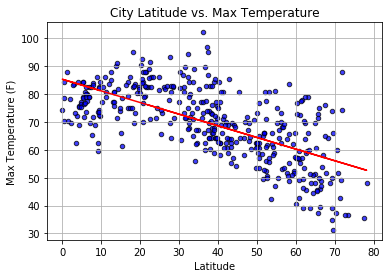

In [16]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(northern_hem_data_df['Lat'], northern_hem_data_df['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_data_df['Lat'], northern_hem_data_df['Max Temperature'])
regress_values = northern_hem_data_df['Lat'] * slope + intercept
plt.plot(northern_hem_data_df['Lat'],regress_values,"r-")

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Northern_Max_Temp_vs_Lat.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

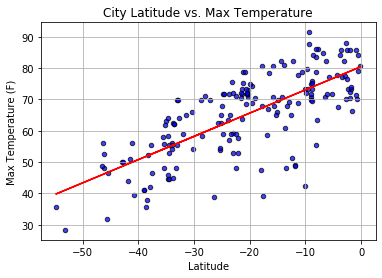

In [17]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(southern_hem_data_df['Lat'], southern_hem_data_df['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_data_df['Lat'], southern_hem_data_df['Max Temperature'])
regress_values =southern_hem_data_df['Lat'] * slope + intercept
plt.plot(southern_hem_data_df['Lat'],regress_values,"r-")

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Southern_Max_Temp_vs_Lat.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

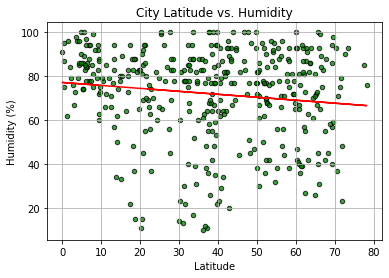

In [18]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(northern_hem_data_df['Lat'], northern_hem_data_df['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_data_df['Lat'], northern_hem_data_df['Humidity'])
regress_values = northern_hem_data_df['Lat'] * slope + intercept
plt.plot(northern_hem_data_df['Lat'],regress_values,"r-")

# Format axis and labels.
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Northern_Humidity_vs_Lat.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

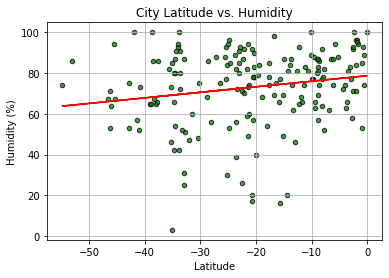

In [19]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(southern_hem_data_df['Lat'], southern_hem_data_df['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_data_df['Lat'], southern_hem_data_df['Humidity'])
regress_values = southern_hem_data_df['Lat'] * slope + intercept
plt.plot(southern_hem_data_df['Lat'],regress_values,"r-")

# Format axis and labels.
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Southern_Humidity_vs_Lat.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

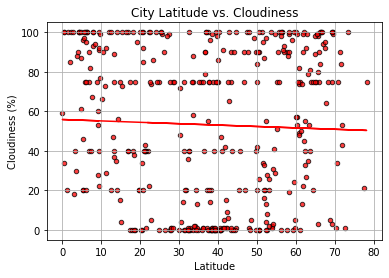

In [20]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(northern_hem_data_df['Lat'], northern_hem_data_df['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_data_df['Lat'], northern_hem_data_df['Cloudiness'])
regress_values = northern_hem_data_df['Lat'] * slope + intercept
plt.plot(northern_hem_data_df['Lat'],regress_values,"r-")

# Format axis and labels.
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Northern_Cloudiness_vs_Lat.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

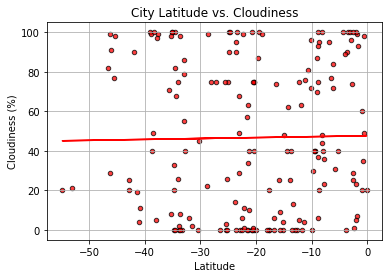

In [21]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(southern_hem_data_df['Lat'], southern_hem_data_df['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_data_df['Lat'], southern_hem_data_df['Cloudiness'])
regress_values = southern_hem_data_df['Lat'] * slope + intercept
plt.plot(southern_hem_data_df['Lat'],regress_values,"r-")

# Format axis and labels.
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Southern_Cloudiness_vs_Lat.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

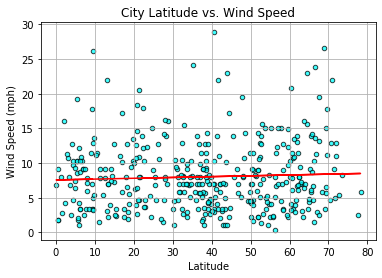

In [22]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(northern_hem_data_df['Lat'], northern_hem_data_df['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_data_df['Lat'], northern_hem_data_df['Wind Speed'])
regress_values = northern_hem_data_df['Lat'] * slope + intercept
plt.plot(northern_hem_data_df['Lat'],regress_values,"r-")

# Format axis and labels.
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Northern_Windspeed_vs_Lat.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

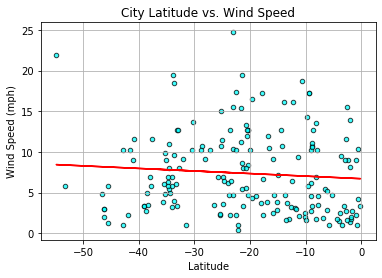

In [23]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(southern_hem_data_df['Lat'], southern_hem_data_df['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)

# Create regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_data_df['Lat'], southern_hem_data_df['Wind Speed'])
regress_values = southern_hem_data_df['Lat'] * slope + intercept
plt.plot(southern_hem_data_df['Lat'],regress_values,"r-")

# Format axis and labels.
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Southern_Windspeed_vs_Lat.png')

plt.show()